In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import category_encoders as ce

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


from scipy.stats import uniform, randint
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


import os
import copy
import time
import random

from itertools import product

# Analisi Esplorativa - Dataset Edge-IIoT

In [65]:

warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Caricamento del dataset
df = pd.read_csv('EdgeIIoT-dataset.csv')

# Colonne numeriche e categoriche
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"Dimensioni del dataset: {df.shape}")
print(f"\nColonne: {list(df.columns)}")
print("------------------------------------------------------------------")

print("\nPrime righe del dataset:")
df.head(10)

Dimensioni del dataset: (2219201, 63)

Colonne: ['frame.time', 'ip.src_host', 'ip.dst_host', 'arp.dst.proto_ipv4', 'arp.opcode', 'arp.hw.size', 'arp.src.proto_ipv4', 'icmp.checksum', 'icmp.seq_le', 'icmp.transmit_timestamp', 'icmp.unused', 'http.file_data', 'http.content_length', 'http.request.uri.query', 'http.request.method', 'http.referer', 'http.request.full_uri', 'http.request.version', 'http.response', 'http.tls_port', 'tcp.ack', 'tcp.ack_raw', 'tcp.checksum', 'tcp.connection.fin', 'tcp.connection.rst', 'tcp.connection.syn', 'tcp.connection.synack', 'tcp.dstport', 'tcp.flags', 'tcp.flags.ack', 'tcp.len', 'tcp.options', 'tcp.payload', 'tcp.seq', 'tcp.srcport', 'udp.port', 'udp.stream', 'udp.time_delta', 'dns.qry.name', 'dns.qry.name.len', 'dns.qry.qu', 'dns.qry.type', 'dns.retransmission', 'dns.retransmit_request', 'dns.retransmit_request_in', 'mqtt.conack.flags', 'mqtt.conflag.cleansess', 'mqtt.conflags', 'mqtt.hdrflags', 'mqtt.len', 'mqtt.msg_decoded_as', 'mqtt.msg', 'mqtt.msgty

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,2021 11:44:10.081753000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
1,2021 11:44:10.162218000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,4.0,MQTT,0,0.0,4.0,0.0,0.0,0.0,0,Normal
2,2021 11:44:10.162271000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
3,2021 11:44:10.162641000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
4,2021 11:44:10.166132000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,Temperature_and_Humidity,24.0,0.0,0.0,0.0,0.0,0,Normal
5,2021 11:44:10.166159000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
6,2021 11:44:10.166968000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
7,2021 11:44:10.167072000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
8,2021 11:44:10.169612000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
9,2021 11:44:10.169644000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal


## 2. Tipi di Dato e Valori Mancanti

In [44]:
df.info()

missing = df.isnull().sum()
missing_total = missing.sum()
print(f"\nValori mancanti totali: {missing_total}")
if missing_total > 0:
    print(missing[missing > 0])
else:
    print("Nessun valore mancante nel dataset.")

<class 'pandas.DataFrame'>
RangeIndex: 2219201 entries, 0 to 2219200
Data columns (total 63 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   frame.time                 str    
 1   ip.src_host                str    
 2   ip.dst_host                object 
 3   arp.dst.proto_ipv4         object 
 4   arp.opcode                 float64
 5   arp.hw.size                float64
 6   arp.src.proto_ipv4         object 
 7   icmp.checksum              float64
 8   icmp.seq_le                float64
 9   icmp.transmit_timestamp    float64
 10  icmp.unused                float64
 11  http.file_data             object 
 12  http.content_length        float64
 13  http.request.uri.query     object 
 14  http.request.method        object 
 15  http.referer               object 
 16  http.request.full_uri      object 
 17  http.request.version       object 
 18  http.response              float64
 19  http.tls_port              float64
 20  tcp.ack      

## 3. Feature raggruppate per Protocollo di Rete

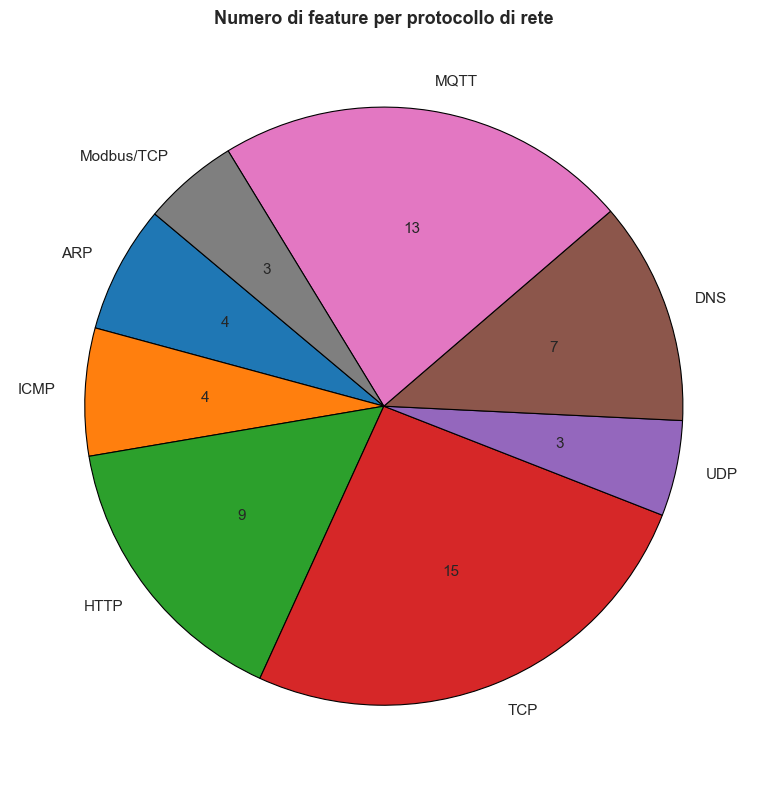

In [45]:
# Feature per protocollo di rete
labels = ['ARP', 'ICMP', 'HTTP', 'TCP', 'UDP', 'DNS', 'MQTT', 'Modbus/TCP']
prefixes = ['arp.', 'icmp.', 'http.', 'tcp.', 'udp.', 'dns.', 'mqtt.', 'mbtcp.']
counts = [sum(c.startswith(p) for c in df.columns) for p in prefixes]

plt.figure(figsize=(10, 8))
plt.pie(counts, labels=labels,
        autopct=lambda pct: f"{int(round(pct / 100 * sum(counts)))}",
        startangle=140, textprops={'fontsize': 11},
        wedgeprops={'edgecolor': 'black', 'linewidth': 0.8})
plt.title('Numero di feature per protocollo di rete', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

## 4. Distribuzione delle Classi (Attack_label)

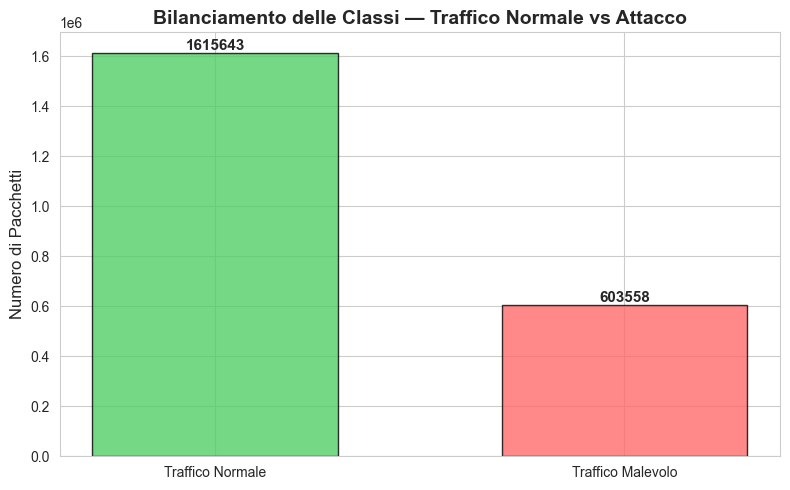

In [46]:
target_counts = df['Attack_label'].value_counts().sort_index()
labels = ['Traffico Normale', 'Traffico Malevolo']
colors = ['#51CF66', '#FF6B6B']

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, target_counts.values, color=colors, edgecolor='black', alpha=0.8, width=0.6)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold', fontsize=11)
    
plt.ylabel('Numero di Pacchetti', fontsize=12)
plt.title('Bilanciamento delle Classi — Traffico Normale vs Attacco', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 5. Distribuzione dei Tipi di Attacco

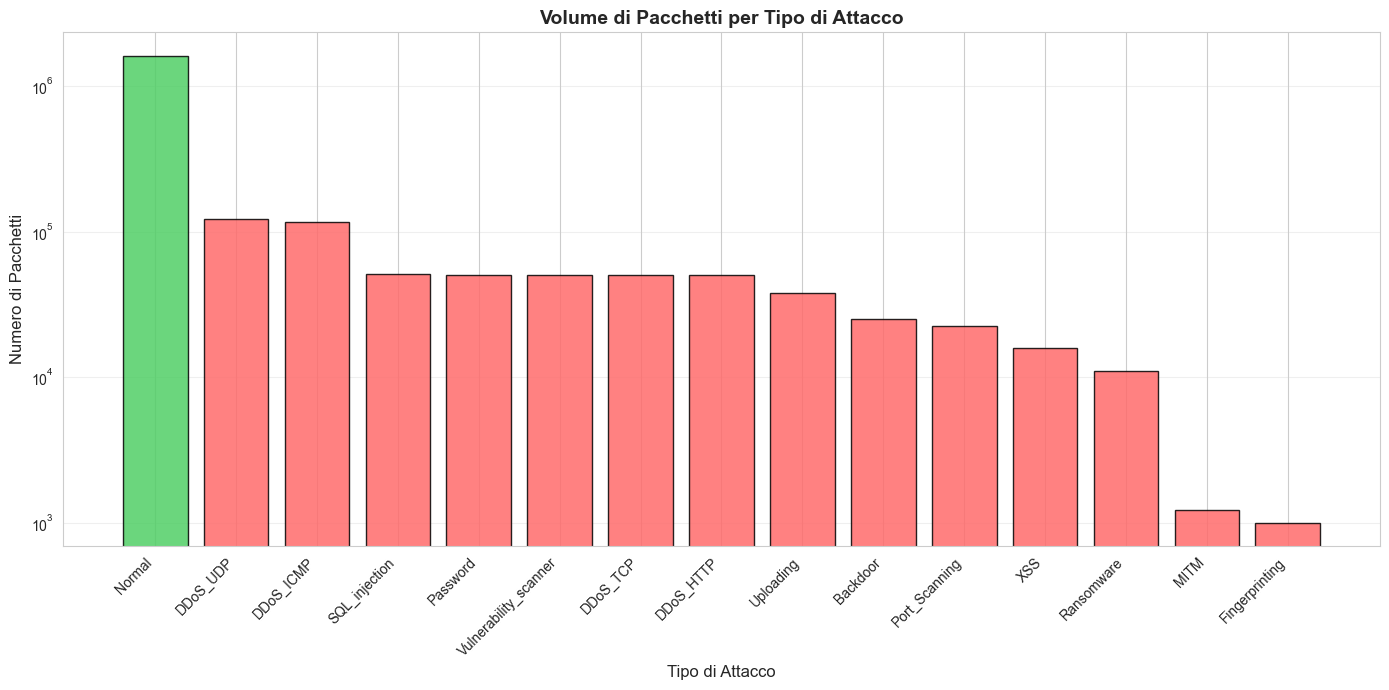

In [47]:
categoria = df['Attack_type'].value_counts().sort_values(ascending=False)
palette = ['#51CF66' if x == 'Normal' else '#FF6B6B' for x in categoria.index]

plt.figure(figsize=(14, 7))
plt.bar(categoria.index, categoria.values, color=palette, edgecolor='black', alpha=0.85)
plt.yscale('log')
plt.xlabel('Tipo di Attacco', fontsize=12)
plt.ylabel('Numero di Pacchetti', fontsize=12)
plt.title('Volume di Pacchetti per Tipo di Attacco', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

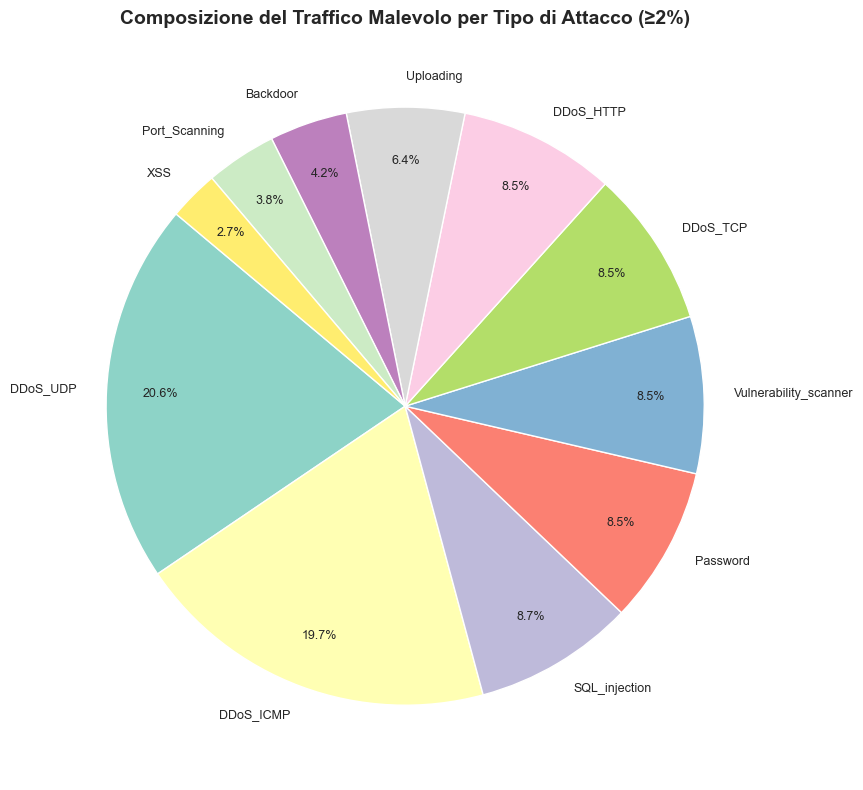

Categorie escluse (<2%): ['Ransomware', 'MITM', 'Fingerprinting']


In [48]:
# Composizione percentuale del traffico malevolo (categorie >= 2%)
attacks_only = df[df['Attack_label'] == 1]['Attack_type'].value_counts()
totale = attacks_only.sum()
attacks_filtered = attacks_only[attacks_only / totale >= 0.02]

plt.figure(figsize=(10, 8))
plt.pie(attacks_filtered.values, labels=attacks_filtered.index, autopct='%1.1f%%',
        startangle=140, colors=plt.cm.Set3(np.linspace(0, 1, len(attacks_filtered))),
        pctdistance=0.82, textprops={'fontsize': 9})
plt.title('Composizione del Traffico Malevolo per Tipo di Attacco (≥2%)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"Categorie escluse (<2%): {list(attacks_only[attacks_only / totale < 0.02].index)}")

## 6. Protocolli Utilizzati per Tipo di Attacco

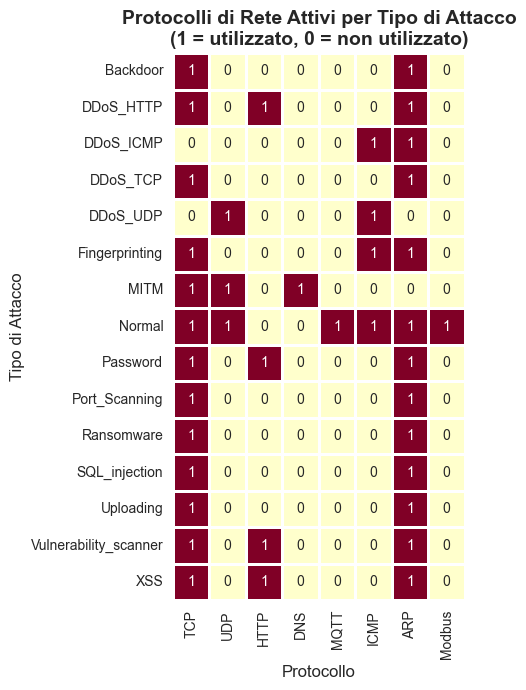

In [49]:
# Heatmap: protocolli attivi per tipo di attacco
proto_cols = {
    'TCP':    ['tcp.ack', 'tcp.checksum', 'tcp.len'],
    'UDP':    ['udp.port', 'udp.stream', 'udp.time_delta'],
    'HTTP':   ['http.content_length', 'http.request.method'],
    'DNS':    ['dns.qry.name.len', 'dns.qry.type'],
    'MQTT':   ['mqtt.len', 'mqtt.msgtype', 'mqtt.hdrflags'],
    'ICMP':   ['icmp.checksum', 'icmp.seq_le'],
    'ARP':    ['arp.opcode', 'arp.hw.size'],
    'Modbus': ['mbtcp.len', 'mbtcp.trans_id']
}

attack_types = sorted(df['Attack_type'].unique())
proto_matrix = pd.DataFrame(0, index=attack_types, columns=proto_cols.keys())

for at in attack_types:
    sub = df[df['Attack_type'] == at]
    for proto, cols in proto_cols.items():
        valid_cols = [c for c in cols if c in sub.columns]
        totale = sub[valid_cols].apply(pd.to_numeric, errors='coerce').sum().sum()
        if totale > 0:
            proto_matrix.loc[at, proto] = 1

plt.figure(figsize=(12, 7))
sns.heatmap(proto_matrix, annot=True, cmap='YlOrRd', linewidths=1,
            cbar=False, fmt='d', square=True, linecolor='white')
plt.title('Protocolli di Rete Attivi per Tipo di Attacco\n(1 = utilizzato, 0 = non utilizzato)',
          fontsize=14, fontweight='bold')
plt.xlabel('Protocollo', fontsize=12)
plt.ylabel('Tipo di Attacco', fontsize=12)
plt.tight_layout()
plt.show()

## 7. Distribuzione delle Feature Categoriche

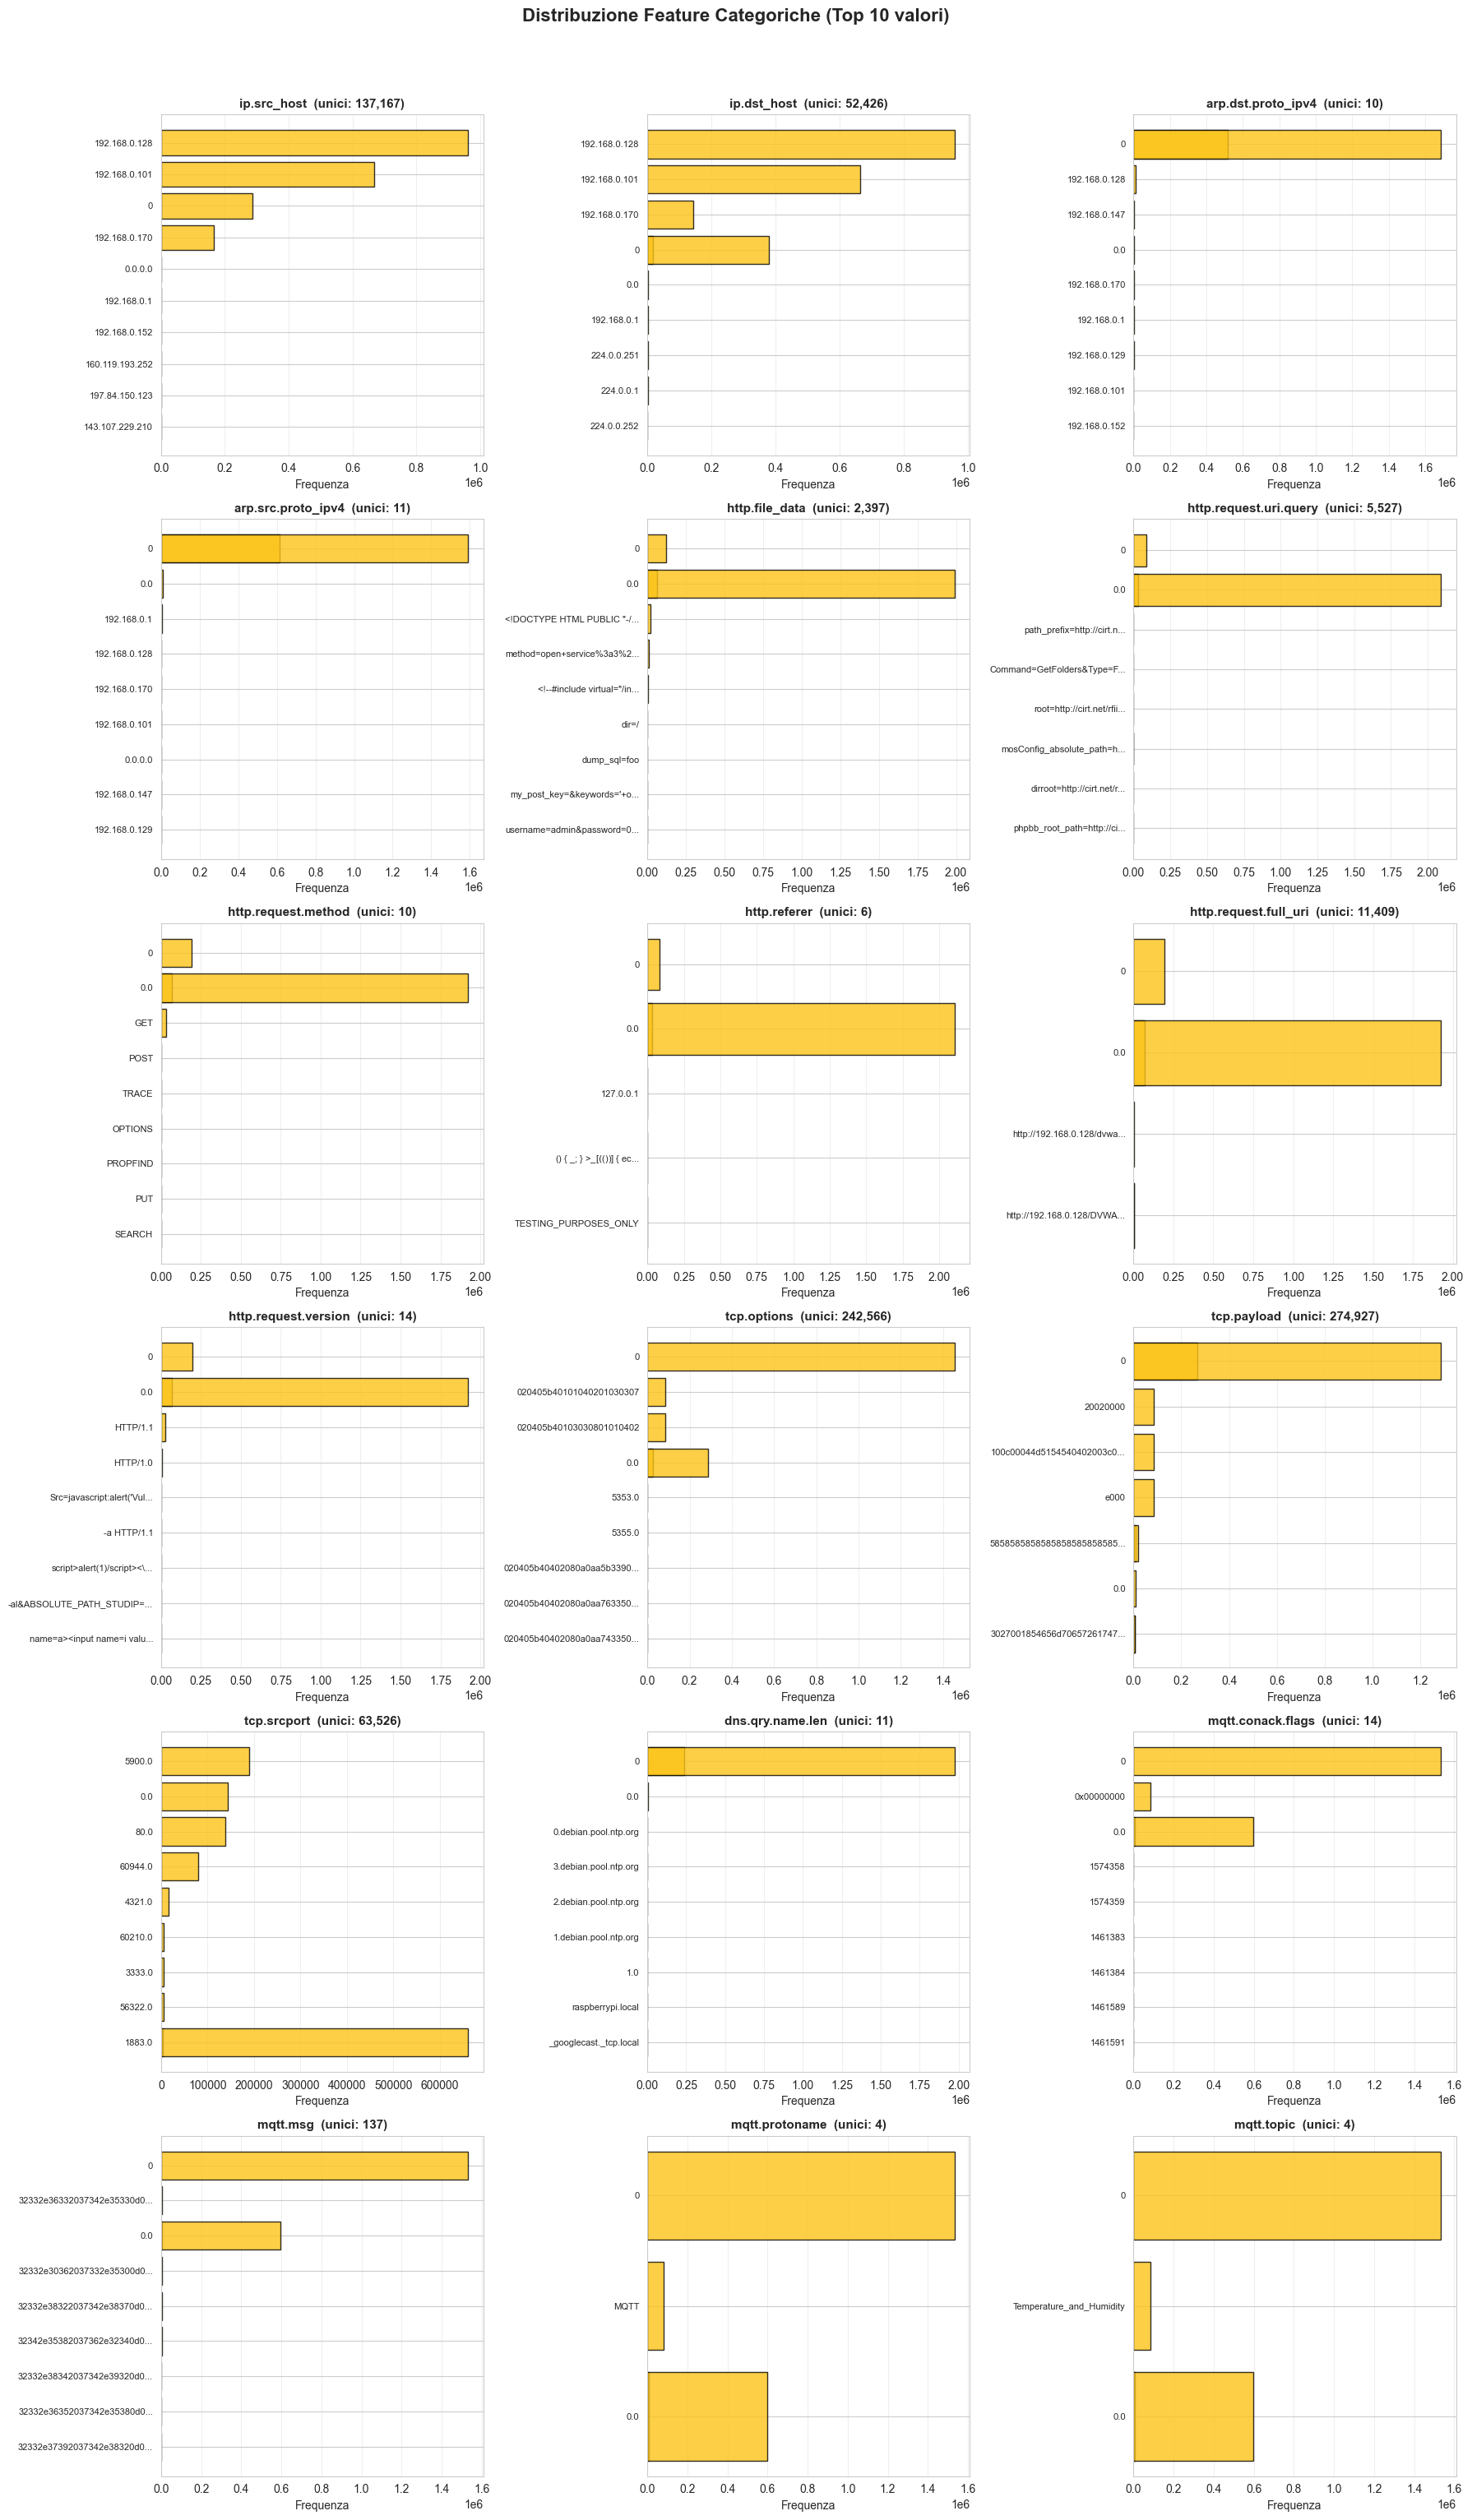

In [50]:
# Distribuzione feature categoriche
cat_features = [c for c in categorical_cols if c not in ['Attack_type', 'frame.time']]

n_cols = 3
n_rows = (len(cat_features) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))

for i, col in enumerate(cat_features):
    ax = axes[i // n_cols, i % n_cols]
    top_vals = df[col].value_counts().head(10)

    nomi = [str(v)[:25] + '...' if len(str(v)) > 25 else str(v) for v in top_vals.index[::-1]]
    valori = top_vals.values[::-1]

    ax.barh(nomi, valori, color='#FCC419', edgecolor='black', alpha=0.8)
    ax.set_title(f'{col}  (unici: {df[col].nunique():,})', fontsize=11, fontweight='bold')
    ax.set_xlabel('Frequenza')
    ax.grid(axis='x', alpha=0.3)
    ax.tick_params(axis='y', labelsize=8)

for j in range(len(cat_features), n_rows * n_cols):
    axes[j // n_cols, j % n_cols].set_visible(False)

plt.suptitle('Distribuzione Feature Categoriche (Top 10 valori)', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## 8. Matrice di Correlazione ed Heatmap


Colonne escluse (varianza zero): {'http.tls_port', 'icmp.unused', 'mqtt.msg_decoded_as', 'dns.qry.type'}
Matrice di Correlazione:
                           arp.opcode  arp.hw.size  icmp.checksum  \
arp.opcode                   1.000000     0.944283      -0.009855   
arp.hw.size                  0.944283     1.000000      -0.010436   
icmp.checksum               -0.009855    -0.010436       1.000000   
icmp.seq_le                 -0.010364    -0.010975       0.702156   
icmp.transmit_timestamp     -0.000297    -0.000315       0.020577   
http.content_length         -0.002422    -0.002565      -0.010119   
http.response               -0.005930    -0.006280      -0.024779   
tcp.ack                     -0.006710    -0.007106      -0.028038   
tcp.ack_raw                 -0.057144    -0.060516      -0.238788   
tcp.checksum                -0.068138    -0.072159      -0.284727   
tcp.connection.fin          -0.014979    -0.015862      -0.062591   
tcp.connection.rst          -0.015479    -

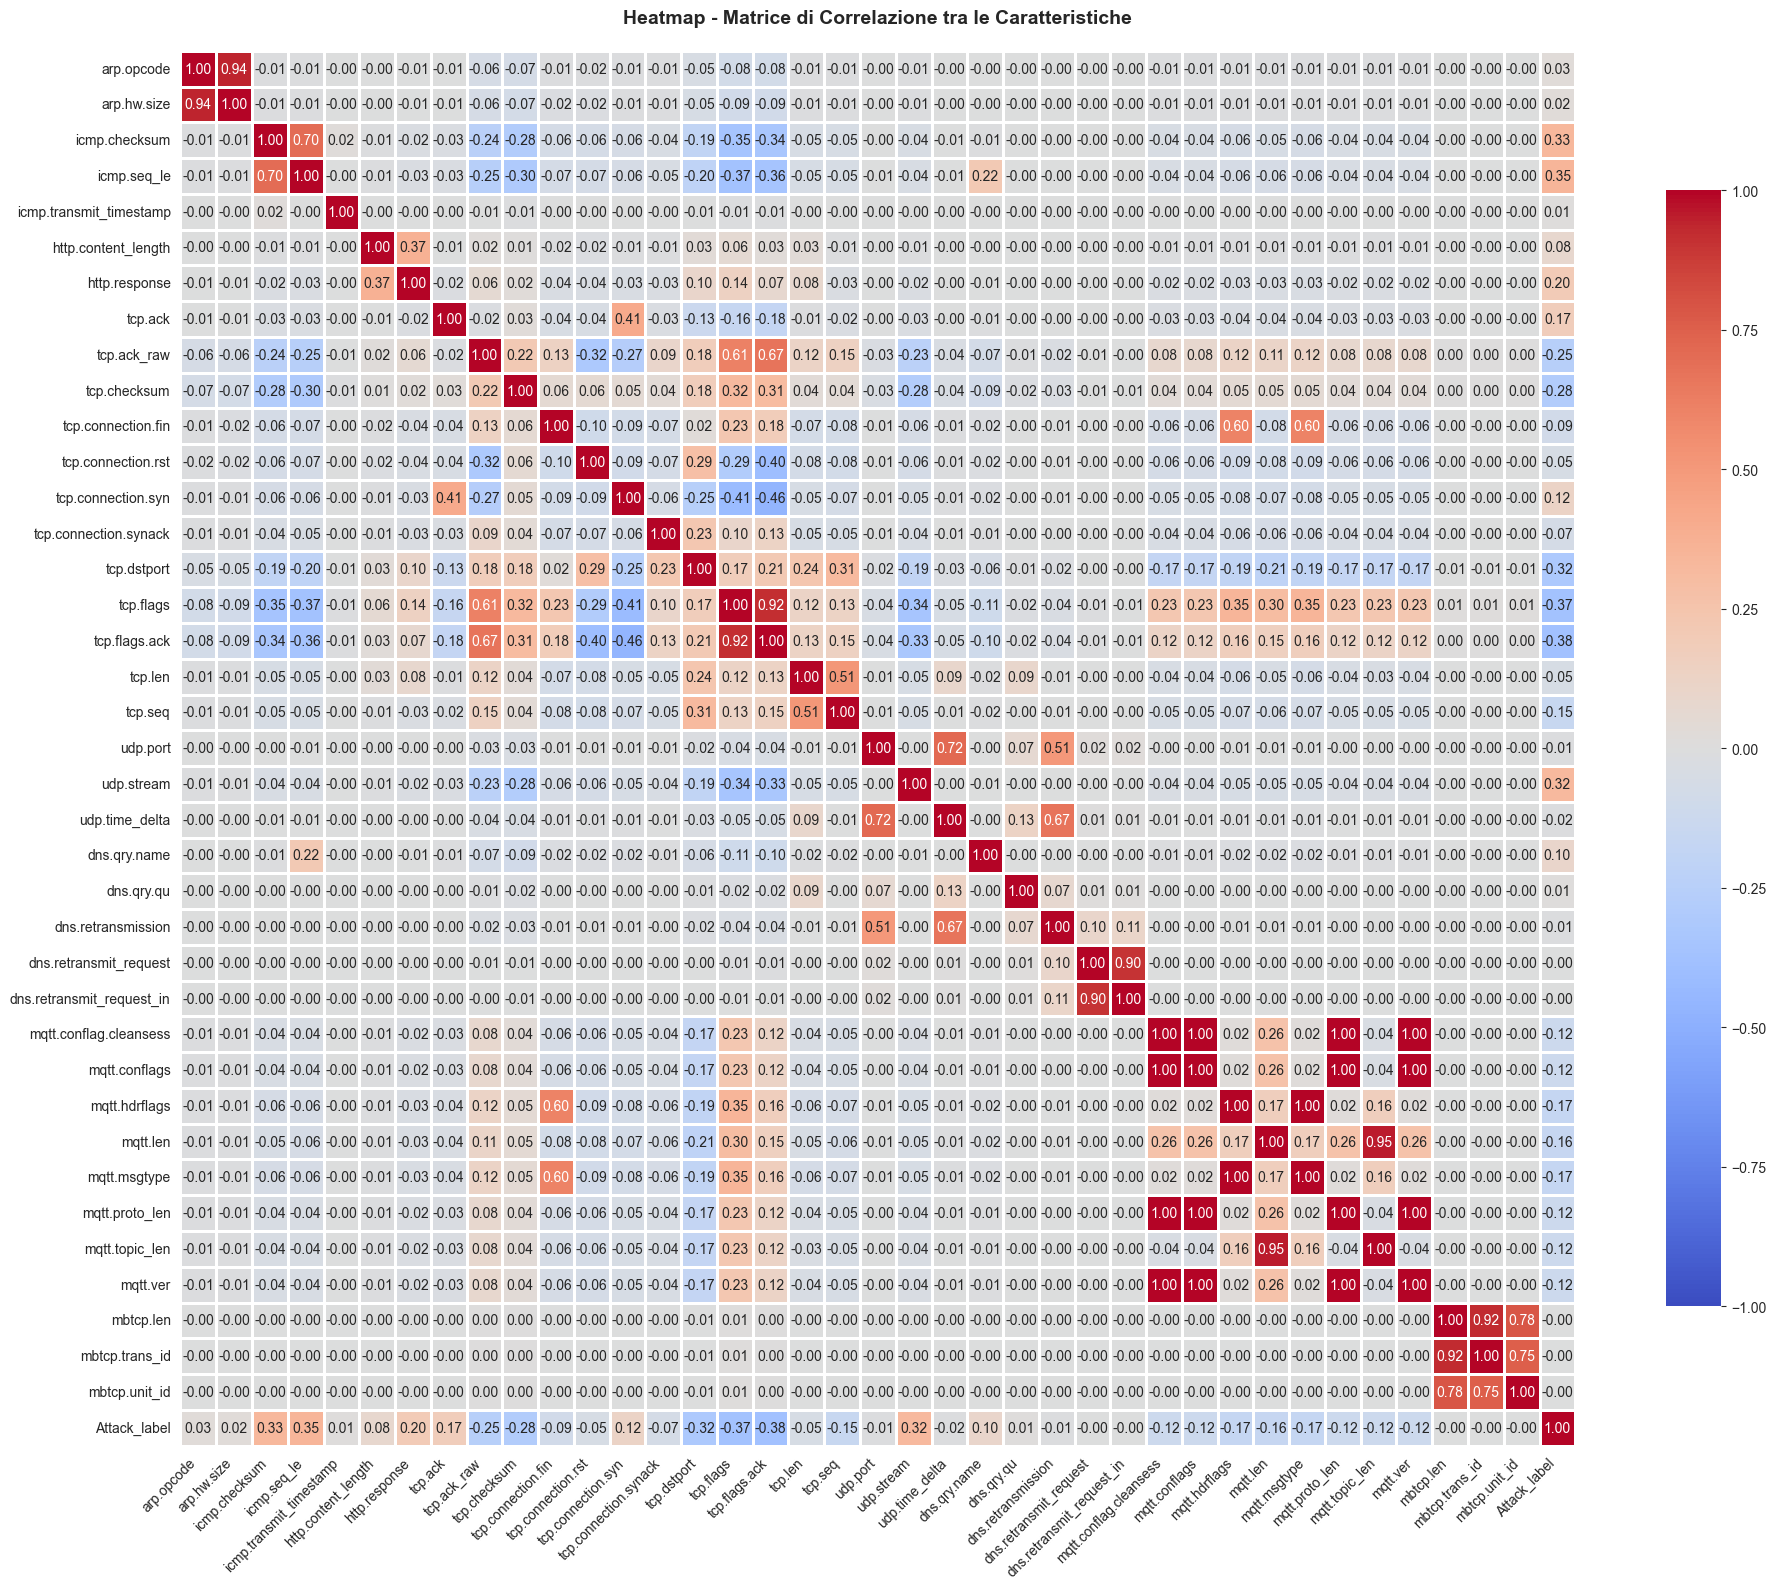

In [51]:
# Escludi colonne a varianza zero (costanti) che generano NaN nella correlazione
varianza_zero = [c for c in numerical_cols if df[c].nunique() > 1]
correlation_matrix = df[varianza_zero].corr()

print(f"Colonne escluse (varianza zero): {set(numerical_cols) - set(varianza_zero)}")
print("Matrice di Correlazione:")
print(correlation_matrix)

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=2, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1, center=0)
plt.title('Heatmap - Matrice di Correlazione tra le Caratteristiche', 
          fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# PREPROCESSING

In [66]:

threshold = 0.95
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
frac_zeros = (df[numeric_cols] == 0).sum() / len(df)
cols_to_drop = frac_zeros[frac_zeros > threshold].index.tolist()

print ("------------------------------------------------------")
print("Colonne numeriche con troppi zeri da droppare:")
print(cols_to_drop)
df = df.drop(columns=cols_to_drop)
print("\nShape dopo drop:", df.shape)
print ("------------------------------------------------------")




numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

categorical_features = df.select_dtypes(include=['object','str']).columns.tolist()


print("Feature numeriche:", numeric_features)
print("Feature categoriche:", categorical_features)


onehot_features = ['arp.dst.proto_ipv4', 'arp.src.proto_ipv4','http.request.method', 'http.request.version','mqtt.conack.flags', 'mqtt.protoname']

labelencode_features = ['ip.src_host', 'ip.dst_host', 'tcp.srcport', 'mqtt.topic','frame.time','dns.qry.name.len']

binary_features = ['http.file_data', 'http.request.uri.query', 'http.referer','http.request.full_uri', 'tcp.options', 'tcp.payload', 'mqtt.msg']


be = ce.BinaryEncoder(cols=binary_features, return_df=True)
df = be.fit_transform(df)


target_feature = 'Attack_type'
le_target = LabelEncoder()
df[target_feature] = le_target.fit_transform(df[target_feature])


for col in labelencode_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

df_enc = pd.get_dummies(df, columns=onehot_features, dummy_na=False)


print("Shape Finale dopo Encoding:", df_enc.shape)
print("------------------------------------------------------")

y = df_enc['Attack_type']
X = df_enc.drop(columns="Attack_type")



## SPLIT in train val test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)


X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val,
    test_size=0.25, 
    random_state=42, 
    stratify=y_train_val  
)





from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
 
print ("------------------------------------------------------")
print(f"Distribuzione originale: {Counter(y_train)}")


rus = RandomUnderSampler(random_state=42, replacement=False)
X_train, y_train = rus.fit_resample(X_train, y_train)
 

print(f"Distribuzione dopo Random Under Sampler: {Counter(y_train)}")
print ("------------------------------------------------------")



scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


------------------------------------------------------
Colonne numeriche con troppi zeri da droppare:
['arp.opcode', 'arp.hw.size', 'icmp.transmit_timestamp', 'icmp.unused', 'http.content_length', 'http.response', 'http.tls_port', 'tcp.connection.synack', 'udp.port', 'udp.time_delta', 'dns.qry.name', 'dns.qry.qu', 'dns.qry.type', 'dns.retransmission', 'dns.retransmit_request', 'dns.retransmit_request_in', 'mqtt.conflag.cleansess', 'mqtt.conflags', 'mqtt.msg_decoded_as', 'mqtt.proto_len', 'mqtt.topic_len', 'mqtt.ver', 'mbtcp.len', 'mbtcp.trans_id', 'mbtcp.unit_id']

Shape dopo drop: (2219201, 38)
------------------------------------------------------
Feature numeriche: ['icmp.checksum', 'icmp.seq_le', 'tcp.ack', 'tcp.ack_raw', 'tcp.checksum', 'tcp.connection.fin', 'tcp.connection.rst', 'tcp.connection.syn', 'tcp.dstport', 'tcp.flags', 'tcp.flags.ack', 'tcp.len', 'tcp.seq', 'udp.stream', 'mqtt.hdrflags', 'mqtt.len', 'mqtt.msgtype', 'Attack_label']
Feature categoriche: ['frame.time', 'ip.

# Modelli

## ADABOOST

In [ ]:

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


from scipy.stats import uniform, randint
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score


# 3. Parametri AdaBoost
param_grid = {
    'n_estimators': [200, 500, 1000], 
    'learning_rate': [0.05, 0.1,0.5], 
    'estimator':[DecisionTreeClassifier(max_depth=3)]

}


ada_search = GridSearchCV(AdaBoostClassifier(random_state=42), param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
ada_search.fit(X_train, y_train)



best_ada = ada_search.best_params_

ada = AdaBoostClassifier(**best_ada, random_state=42)
ada.fit(X_train, y_train)

y_pred_ada = ada.predict(X_test)



best f1_weighted: 0.999782842939758
AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.05, n_estimators=1000, random_state=42)
Accuracy AdaBoost: 0.9996

Classification Report:

                       precision    recall  f1-score   support

             Backdoor       1.00      1.00      1.00      4891
            DDoS_HTTP       1.00      1.00      1.00     10117
            DDoS_ICMP       1.00      1.00      1.00     23171
             DDoS_TCP       1.00      1.00      1.00     10079
             DDoS_UDP       1.00      1.00      1.00     24323
       Fingerprinting       0.98      1.00      0.99       182
                 MITM       1.00      1.00      1.00       263
               Normal       1.00      1.00      1.00    323305
             Password       0.99      1.00      1.00      9971
        Port_Scanning       0.99      1.00      1.00      4514
           Ransomware       1.00      1.00      1.00      2160
        SQL_inj

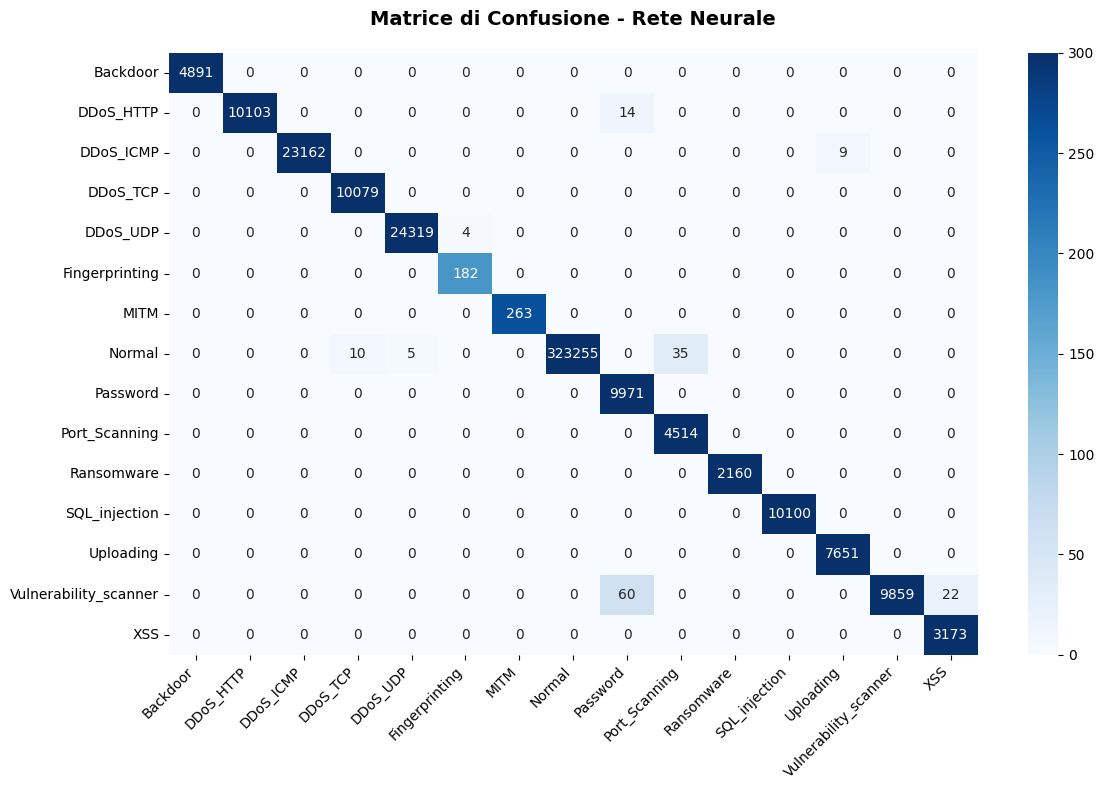

In [59]:
print("best f1_weighted:", ada_search.best_score_)
print(ada_search.best_estimator_)

acc_ada = accuracy_score(y_test, y_pred_ada)
print(f"Accuracy AdaBoost: {acc_ada:.4f}")


print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_ada, target_names=le_target.classes_))


cm_ada = confusion_matrix(y_test, y_pred_ada)


labels = le_target.classes_

plt.figure(figsize=(12, 8))
sns.heatmap(cm_ada, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels,
            yticklabels=labels,vmin=0, vmax=300)
plt.title('Matrice di Confusione - Rete Neurale', 
          fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# RANDOM FOREST

In [60]:
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}


grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1_weighted',n_jobs=-1)
grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
print(f"Migliori parametri RF: {grid_rf.best_params_}")

Migliori parametri RF: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


Accuracy Random Forest: 0.9999

Classification Report:

                       precision    recall  f1-score   support

             Backdoor       1.00      1.00      1.00      4891
            DDoS_HTTP       1.00      1.00      1.00     10117
            DDoS_ICMP       1.00      1.00      1.00     23171
             DDoS_TCP       1.00      1.00      1.00     10079
             DDoS_UDP       1.00      1.00      1.00     24323
       Fingerprinting       1.00      1.00      1.00       182
                 MITM       1.00      1.00      1.00       263
               Normal       1.00      1.00      1.00    323305
             Password       1.00      1.00      1.00      9971
        Port_Scanning       1.00      1.00      1.00      4514
           Ransomware       1.00      1.00      1.00      2160
        SQL_injection       1.00      1.00      1.00     10100
            Uploading       1.00      1.00      1.00      7651
Vulnerability_scanner       1.00      1.00      1.00      994

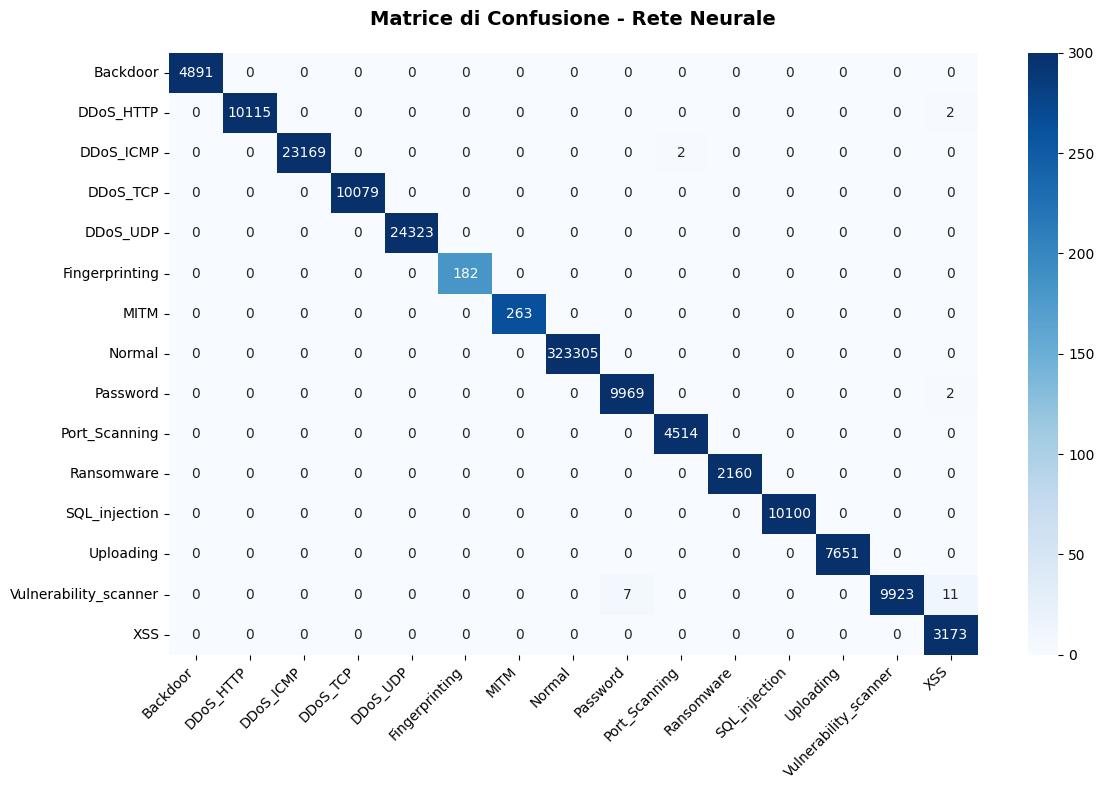

In [61]:
y_pred_rf = best_rf.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy Random Forest: {acc_rf:.4f}")


print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_rf, target_names=le_target.classes_))


cm_rf = confusion_matrix(y_test, y_pred_rf)
labels = le_target.classes_

plt.figure(figsize=(12, 8))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels,
            yticklabels=labels,vmin=0, vmax=300)
plt.title('Matrice di Confusione - Rete Neurale', 
          fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## RETE NEURALE

In [57]:

# Configurazione
torch.manual_seed(42)
np.random.seed(42)
plt.style.use('default')

print("📦 Librerie caricate con successo!")
print(f"🔥 PyTorch: {torch.__version__}")

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"⚙️ Device: {device}")

num_classes = len(le_target.classes_)
print(f"🏷️ Numero classi: {num_classes} → {list(le_target.classes_)}")

print("📊 DIVISIONE DATASET:")
print(f"🏋️ Train:      {len(X_train):6d} campioni ({len(X_train)/(len(X_train)+len(X_val)+len(X_test))*100:.1f}%)")
print(f"✅ Validation: {len(X_val):6d} campioni ({len(X_val)/(len(X_train)+len(X_val)+len(X_test))*100:.1f}%)")
print(f"🎯 Test:       {len(X_test):6d} campioni ({len(X_test)/(len(X_train)+len(X_val)+len(X_test))*100:.1f}%)")



print("\n🔍 Distribuzione classi per set:")
for name, y_set in [("Train", y_train), ("Val", y_val), ("Test", y_test)]:
    dist = [np.sum(y_set == i) for i in range(num_classes)]
    print(f"{name:5}: {dist}")



X_train_tensor = torch.FloatTensor(X_train)
X_val_tensor = torch.FloatTensor(X_val) 
X_test_tensor = torch.FloatTensor(X_test)
y_train_tensor = torch.LongTensor(np.array(y_train, dtype=np.int64))
y_val_tensor = torch.LongTensor(np.array(y_val, dtype=np.int64))  
y_test_tensor = torch.LongTensor(np.array(y_test, dtype=np.int64))  

print(f"\n🔄 TENSORI PYTORCH:")
print(f"X_train: {X_train_tensor.shape}")
print(f"X_val:   {X_val_tensor.shape}")
print(f"X_test:  {X_test_tensor.shape}")
print(f"Input features: {X_train_tensor.shape[1]}")




def fix_random(seed):
    torch.manual_seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

fix_random(42)

val_dataloader = DataLoader(TensorDataset(X_val_tensor, y_val_tensor), batch_size=y_val_tensor.shape[0])
test_dataloader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=y_test_tensor.shape[0])

def get_model(input_size, num_classes, dept=3, hidden_size=64, dropout_prob=0.2):


    model = [nn.Linear(input_size, hidden_size), nn.ReLU()]
    

    for i in range(dept):
        model.append(nn.Linear(hidden_size, hidden_size)) 
        model.append(nn.ReLU())                           
        model.append(nn.Dropout(dropout_prob))            
        
    
    model.append(nn.Linear(hidden_size, num_classes))
    
    
    return nn.Sequential(*model)


# GRID SEARCH 
hidden_sizes = [128, 256]          
dropout_probs = [0.2, 0.3]         
depts = [3, 4]                     
batch_sizes = [16, 32]             
learning_rates = [0.001, 0.01]     

params = product(hidden_sizes, dropout_probs, depts, batch_sizes, learning_rates)

#numero di combinazioni
combinations = len(hidden_sizes)*len(dropout_probs)*len(depts)*len(batch_sizes)*len(learning_rates)
print("Numero totale di configurazioni da testare: ", combinations)


def train(model, train_dataloader, val_dataloader, device, hidden_size=64, dropout_prob=0.2, dept=3, epochs=100, batch_size=32, learning_rate=.001):
    
    
    model = model.to(device)
    
    
    criterion = nn.CrossEntropyLoss()
    
    
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    
    train_loss = []
    val_loss = []

    # EARLY STOPPING:
    
    best_model = None
    best_loss = np.inf   
    patience = 10        
    patience_counter = 0

    # ciclo delle Epoche
    for epoch in range(epochs):
        epoch_start = time.time()
        epoch_loss = 0

        
        model.train() 

        
        for x, y in train_dataloader:
            x, y = x.to(device), y.to(device) 
            
            optimizer.zero_grad()    
            y_pred = model(x)        
            loss = criterion(y_pred, y)
            loss.backward()         
            optimizer.step()        
            
            epoch_loss += loss.item()

        
        train_loss.append(epoch_loss / len(train_dataloader))

        
        model.eval()
        epoch_val_loss = 0
        with torch.no_grad():
            for x, y in val_dataloader:
                x, y = x.to(device), y.to(device)
                y_pred = model(x)
                loss = criterion(y_pred, y)
                epoch_val_loss += loss.item()
        val_loss.append(epoch_val_loss / len(val_dataloader))

        # Stampa dei progressi 
        if (epoch+1) % 10 == 0:
            print(f'Epoch {epoch+1}/{epochs}, Train loss: {train_loss[-1]:.4f}, Val loss: {val_loss[-1]:.4f}, Time: {time.time()-epoch_start:.2f}s')

        
        #check early stopping
        if val_loss[-1] < best_loss:
            best_loss = val_loss[-1]
            best_model = copy.deepcopy(model)
            patience_counter = 0 
        else:
            
            patience_counter += 1
            if patience_counter == patience:
            
                print("Early stopping...") 
                break

    print("Training terminato in {} epoche. Miglior validation loss: {}".format(epoch+1, best_loss))

    
    return best_model, train_loss, val_loss




def test_model(model, dataloader, device):

    model.eval()
    y_pred = []
    y_true = []
    
    with torch.no_grad():
        for x, y in dataloader:
            x, y = x.to(device), y.to(device)
            
            output = model(x)
            _, predicted = torch.max(output, 1) 
            
            y_pred.extend(predicted.cpu().tolist())
            y_true.extend(y.cpu().tolist())
            
    return y_pred, y_true


# Numero di feature in input
input_size = X_train.shape[1]



best_nn_model = None
best_val_accuracy = 0
best_config = None
iter_count = 0 


for hs, dp, d, bs, lr in params:
    iter_count += 1
    print(f'\n--- Iterazione {iter_count}/{combinations} ---')
    print(f'Configurazione: Hidden={hs}, Drop={dp}, Dept={d}, Batch={bs}, LR={lr}')

    
    model = get_model(input_size, num_classes, dept=d, hidden_size=hs, dropout_prob=dp)
    
    
    train_dataloader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=bs, shuffle=True)

    
    config = {
        'hidden_size': hs,
        'dropout_prob': dp,
        'dept': d,
        'batch_size': bs,
        'learning_rate': lr
    }

    
    trained_model, train_loss, val_loss = train(model, train_dataloader, val_dataloader, device, **config)

    
    y_pred_val, y_true_val = test_model(trained_model, val_dataloader, device)
    val_acc = accuracy_score(y_true_val, y_pred_val)
    
    print(f'Validation Accuracy: {val_acc:.4f} (Migliore attuale: {best_val_accuracy:.4f})')

    
    if val_acc > best_val_accuracy:
        best_val_accuracy = val_acc
        best_nn_model = copy.deepcopy(trained_model) 
        best_config = config
        print("🏆 NUOVO RECORD!")


📦 Librerie caricate con successo!
🔥 PyTorch: 2.10.0+cpu
⚙️ Device: cpu
🏷️ Numero classi: 15 → ['Backdoor', 'DDoS_HTTP', 'DDoS_ICMP', 'DDoS_TCP', 'DDoS_UDP', 'Fingerprinting', 'MITM', 'Normal', 'Password', 'Port_Scanning', 'Ransomware', 'SQL_injection', 'Uploading', 'Vulnerability_scanner', 'XSS']
📊 DIVISIONE DATASET:
🏋️ Train:        9210 campioni (1.0%)
✅ Validation: 443840 campioni (49.5%)
🎯 Test:       443841 campioni (49.5%)

🔍 Distribuzione classi per set:
Train: [np.int64(614), np.int64(614), np.int64(614), np.int64(614), np.int64(614), np.int64(614), np.int64(614), np.int64(614), np.int64(614), np.int64(614), np.int64(614), np.int64(614), np.int64(614), np.int64(614), np.int64(614)]
Val  : [np.int64(4993), np.int64(9949), np.int64(23316), np.int64(9996), np.int64(24311), np.int64(205), np.int64(238), np.int64(323084), np.int64(10046), np.int64(4512), np.int64(2191), np.int64(10276), np.int64(7496), np.int64(10042), np.int64(3185)]
Test : [np.int64(4891), np.int64(10117), np.int6

Best config: {'hidden_size': 128, 'dropout_prob': 0.2, 'dept': 3, 'batch_size': 32, 'learning_rate': 0.001}
Best Validation Accuracy: 0.9999

Test Accuracy (Rete Neurale): 0.9999

Classification Report:

                       precision    recall  f1-score   support

             Backdoor       1.00      1.00      1.00      4891
            DDoS_HTTP       1.00      1.00      1.00     10117
            DDoS_ICMP       1.00      1.00      1.00     23171
             DDoS_TCP       1.00      1.00      1.00     10079
             DDoS_UDP       1.00      1.00      1.00     24323
       Fingerprinting       1.00      1.00      1.00       182
                 MITM       1.00      1.00      1.00       263
               Normal       1.00      1.00      1.00    323305
             Password       1.00      1.00      1.00      9971
        Port_Scanning       1.00      1.00      1.00      4514
           Ransomware       1.00      1.00      1.00      2160
        SQL_injection       1.00      1

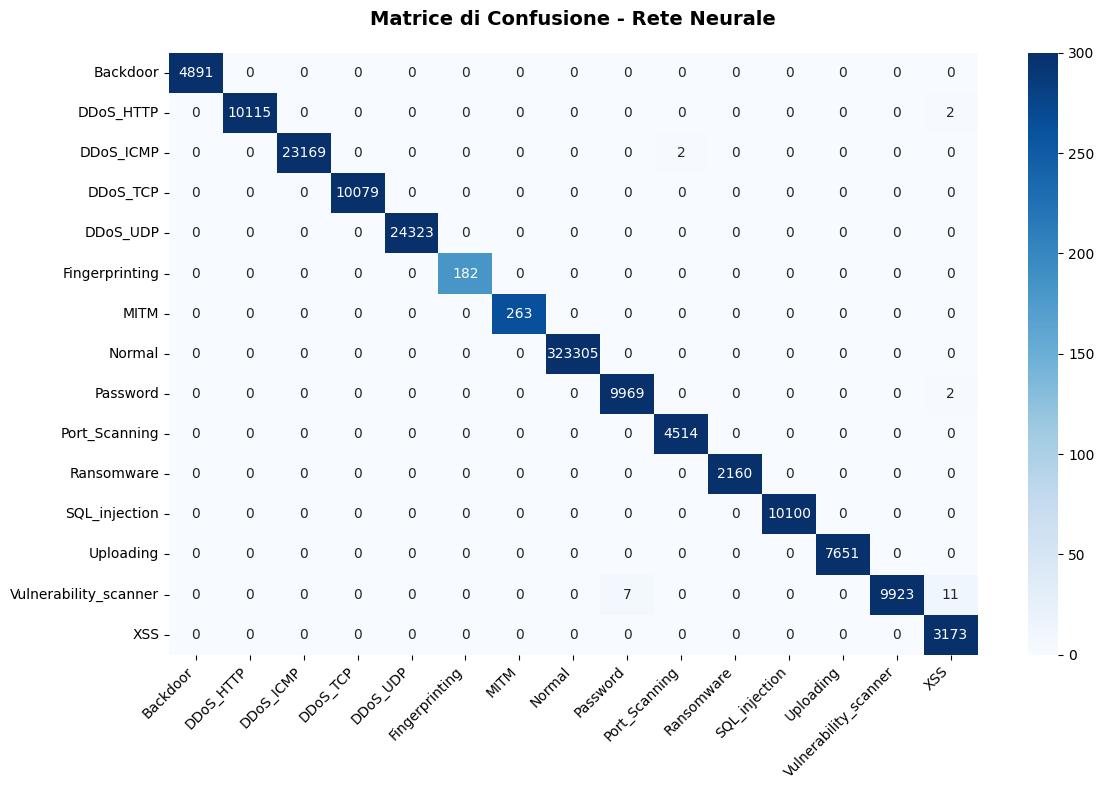

In [58]:

print(f'Best config: {best_config}')
print(f'Best Validation Accuracy: {best_val_accuracy:.4f}')


y_pred_nn, y_true_nn = test_model(best_nn_model, test_dataloader, device)
acc_nn = accuracy_score(y_true_nn, y_pred_nn)
print(f'\nTest Accuracy (Rete Neurale): {acc_nn:.4f}')


print("\nClassification Report:\n")
print(classification_report(y_true_nn, y_pred_nn, target_names=le_target.classes_))


cm_nn = confusion_matrix(y_true_nn, y_pred_nn)
labels = le_target.classes_

plt.figure(figsize=(12, 8))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels,
            yticklabels=labels,vmin=0, vmax=300)
plt.title('Matrice di Confusione - Rete Neurale', 
          fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()